<a href="https://colab.research.google.com/github/HungLV2512/NLP/blob/main/ASM2/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0.]]


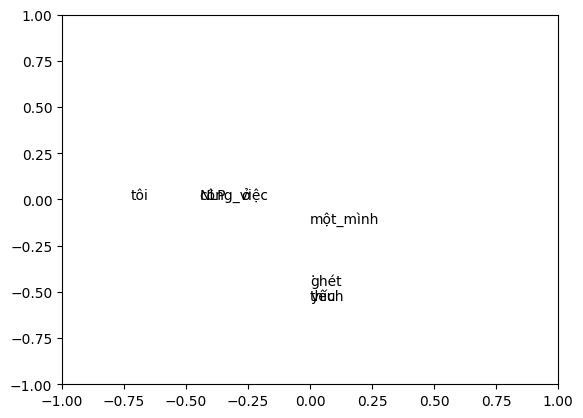

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

la = np.linalg

corpus = ["tôi yêu công_việc .",
          "tôi thích NLP .",
          "tôi ghét ở một_mình"]

words = []
for sentence in corpus:
    words.extend(sentence.split())

words = list(set(words))
words.sort()

X = np.zeros((len(words), len(words)))

for sentence in corpus:
    tokens = sentence.split()
    for i, token in enumerate(tokens):
        if i == 0:
            X[words.index(token), words.index(tokens[i + 1])] += 1
        elif i == len(tokens) - 1:
            X[words.index(token), words.index(tokens[i - 1])] += 1
        else:
            X[words.index(token), words.index(tokens[i + 1])] += 1
            X[words.index(token), words.index(tokens[i - 1])] += 1

print(X)

U, s, Vh = la.svd(X, full_matrices=False)

plt.xlim(-1, 1)
plt.ylim(-1, 1)

for i in range(len(words)):
    plt.text(U[i, 0], U[i, 1], words[i])

plt.show()
